In [67]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# lecture 5
import pandas as pd

ages = [10, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32, 1000]
bins = [18, 25, 35, 60, 100]

In [27]:
cats = pd.cut(ages, bins)

In [28]:
cats.codes

array([-1,  0,  0,  1,  0,  0,  2,  1,  3,  2,  2,  1, -1], dtype=int8)

In [29]:
cats.categories

Index([u'(18, 25]', u'(25, 35]', u'(35, 60]', u'(60, 100]'], dtype='object')

In [30]:
pd.value_counts(cats)

(18, 25]     4
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [10]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, object): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [11]:
pd.cut(ages, bins)

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [12]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

cats1 = pd.cut(ages, bins, labels=group_names)

In [13]:
print cats1

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]


In [14]:
print pd.value_counts(cats1)

Youth         5
MiddleAged    3
YoungAdult    3
Senior        1
dtype: int64


In [16]:
# slide 4 - doing quantile cuts
# quantile cuts - qcuts
import numpy as np
data = np.random.randn(100)
cats2 = pd.qcut(data, 4)

print cats2
print pd.value_counts(cats2)

[[-2.308, -0.753], (-0.753, -0.117], (0.855, 2.153], (-0.117, 0.855], (0.855, 2.153], ..., [-2.308, -0.753], (-0.753, -0.117], (0.855, 2.153], (0.855, 2.153], (-0.753, -0.117]]
Length: 100
Categories (4, object): [[-2.308, -0.753] < (-0.753, -0.117] < (-0.117, 0.855] < (0.855, 2.153]]
(0.855, 2.153]      25
(-0.117, 0.855]     25
(-0.753, -0.117]    25
[-2.308, -0.753]    25
dtype: int64


In [17]:
# slide 3 - doing binning
c = pd.cut(np.random.randn(20), 4, precision=2)
print c
print pd.value_counts(c)

[(0.38, 1.41], (1.41, 2.44], (1.41, 2.44], (-1.69, -0.65], (-1.69, -0.65], ..., (1.41, 2.44], (1.41, 2.44], (-0.65, 0.38], (-0.65, 0.38], (-1.69, -0.65]]
Length: 20
Categories (4, object): [(-1.69, -0.65] < (-0.65, 0.38] < (0.38, 1.41] < (1.41, 2.44]]
(1.41, 2.44]      8
(-0.65, 0.38]     5
(-1.69, -0.65]    5
(0.38, 1.41]      2
dtype: int64


In [18]:
# specify your own percentiles

pd.value_counts(pd.qcut(data, [0, 0.1, 0.5, 0.9, 1]))

(-0.117, 1.43]      40
(-1.334, -0.117]    40
(1.43, 2.153]       10
[-2.308, -1.334]    10
dtype: int64

In [20]:
# detecting and filtering outliers

data_f = pd.DataFrame(np.random.randn(1000, 4))
data_f.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.061395,0.006157,-0.015798,-0.018775
std,1.011980,0.982066,1.010234,0.993865
min,-3.342474,-2.989414,-3.323424,-3.231013
25%,-0.635728,-0.680814,-0.723157,-0.687261
50%,0.081013,-0.038723,-0.034809,0.007044
75%,0.797754,0.732058,0.688573,0.660640
max,3.173655,2.618983,3.560269,3.480419


In [43]:
data_f.shape

(1000, 4)

In [44]:
col = data_f[3]

In [45]:
col[np.abs(col) > 3]

341   -3.231013
384    3.480419
Name: 3, dtype: float64

In [46]:
col[np.abs(col) > 2.8]

341   -3.231013
384    3.480419
678   -2.912029
698    2.952343
825   -2.896077
Name: 3, dtype: float64

In [49]:
data_f[(np.abs(data_f) > 2.9).any(axis=1)]

,0,1,2,3
79,-2.904591,0.683175,-0.022134,0.087869
184,-0.513939,0.877640,3.560269,0.064802
341,1.350306,0.527216,-0.196351,-3.231013
384,0.625290,-1.345876,-0.453973,3.480419
550,3.173655,-0.320584,0.396231,0.187094
678,0.888730,0.920332,0.975787,-2.912029
690,-0.646276,1.385148,-3.323424,0.156278
698,-0.774982,0.323108,1.405230,2.952343
708,-0.415486,-0.474962,3.030258,-0.065736
743,-3.342474,1.177698,-0.900873,0.576275


In [52]:
data_f[(np.abs(data_f) > 2.9).any(1)]

,0,1,2,3
79,-2.904591,0.683175,-0.022134,0.087869
184,-0.513939,0.877640,3.560269,0.064802
341,1.350306,0.527216,-0.196351,-3.231013
384,0.625290,-1.345876,-0.453973,3.480419
550,3.173655,-0.320584,0.396231,0.187094
678,0.888730,0.920332,0.975787,-2.912029
690,-0.646276,1.385148,-3.323424,0.156278
698,-0.774982,0.323108,1.405230,2.952343
708,-0.415486,-0.474962,3.030258,-0.065736
743,-3.342474,1.177698,-0.900873,0.576275


In [53]:
data_f1 = pd.DataFrame(np.random.randn(5,2))
print data_f1

          0         1
0  1.617605 -1.664446
1  1.738088 -0.832354
2 -0.207324  0.046241
3  0.717739  0.662471
4  0.107043 -0.082497


In [54]:
np.sign(data_f1)

,0,1
0,1,-1
1,1,-1
2,-1,1
3,1,1
4,1,-1


In [56]:
df_dummy = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                        'data1': range(6)})
print df_dummy
print pd.get_dummies(df_dummy['key'])

   data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   b
   a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0


In [57]:
print pd.get_dummies(df_dummy['key'], prefix='key')

   key_a  key_b  key_c
0      0      1      0
1      0      1      0
2      1      0      0
3      0      0      1
4      1      0      0
5      0      1      0


In [62]:
dummies = pd.get_dummies(df_dummy['key'], prefix='key')

In [65]:
df_dummy[['data1']].join(dummies)

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [66]:
values = np.random.rand(10)
print values
print pd.get_dummies(pd.qcut(values, 5)) 

[ 0.06212632  0.64214908  0.58124676  0.25185338  0.02895463  0.16620105
  0.31862799  0.90591959  0.11623078  0.78411196]
   [0.029, 0.105]  (0.105, 0.218]  (0.218, 0.424]  (0.424, 0.671]  \
0               1               0               0               0   
1               0               0               0               1   
2               0               0               0               1   
3               0               0               1               0   
4               1               0               0               0   
5               0               1               0               0   
6               0               0               1               0   
7               0               0               0               0   
8               0               1               0               0   
9               0               0               0               0   

   (0.671, 0.906]  
0               0  
1               0  
2               0  
3               0  
4               0

In [68]:
plot(np.arange(10))

NameError: name 'plot' is not defined

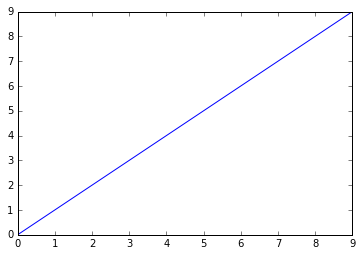

In [69]:
plt.plot(np.arange(10))

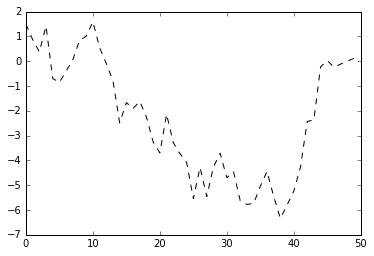

In [70]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [72]:
fig = plt.figure()

In [73]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

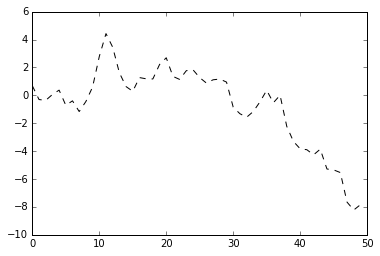

In [83]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

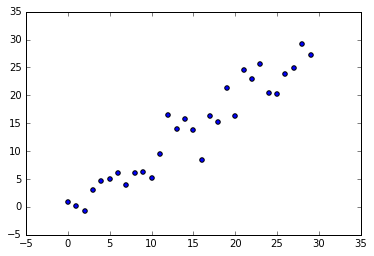

In [80]:
plt.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

(array([   1.,    3.,    7.,   14.,   21.,   34.,   59.,   96.,  100.,
         123.,  120.,  124.,  109.,   79.,   45.,   30.,   24.,    6.,
           4.,    1.]),
 array([-3.23494512, -2.9232886 , -2.61163207, -2.29997555, -1.98831903,
        -1.67666251, -1.36500599, -1.05334947, -0.74169295, -0.43003643,
        -0.11837991,  0.19327661,  0.50493313,  0.81658965,  1.12824617,
         1.43990269,  1.75155921,  2.06321573,  2.37487225,  2.68652877,
         2.99818529]),
 <a list of 20 Patch objects>)

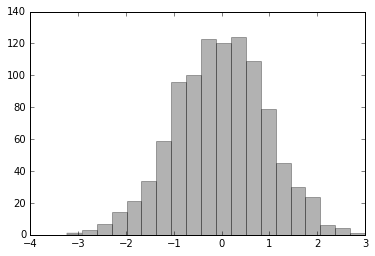

In [82]:
plt.hist(np.random.randn(1000), bins=20, color='k', alpha=0.3)

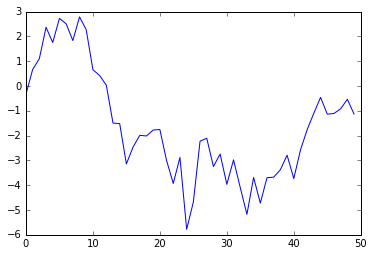

In [85]:
plt.plot(np.random.randn(50).cumsum())

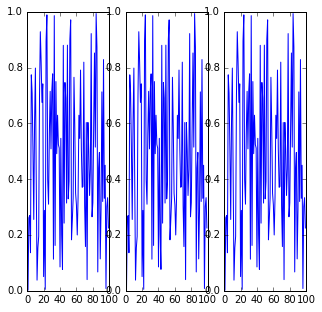

In [88]:
x = np.random.rand(100)

fig = plt.figure(figsize=(5,5))
ax_a = fig.add_subplot(131)
ax_b = fig.add_subplot(132)
ax_c = fig.add_subplot(133)

for iax in [ax_a, ax_b, ax_c]:
    iax.plot(x)

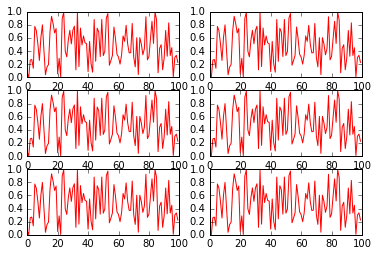

In [89]:
fig, axs = plt.subplots(nrows=3, ncols=2)
for iax in axs.flat:
    iax.plot(x, color='r')

list

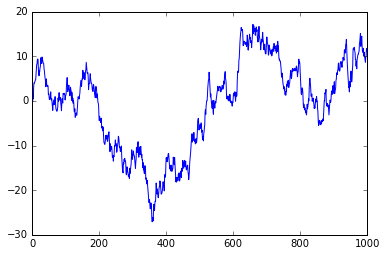

In [93]:
p = plt.plot(np.random.randn(1000).cumsum())
type(p)

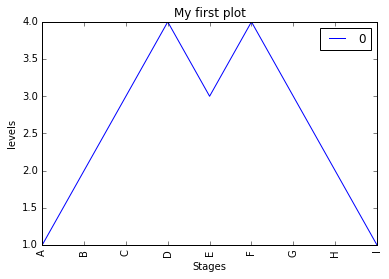

In [97]:
import string

data_d=pd.DataFrame([1,2,3,4,3,4,3,2,1])
ax = data_d.plot(kind = 'line',title="label")
ax.set_xticklabels(string.uppercase[:len(data_d)], rotation='vertical')
ax.set_title('My first plot')
ax.set_xlabel('Stages')
ax.set_ylabel('levels')
plt.show()

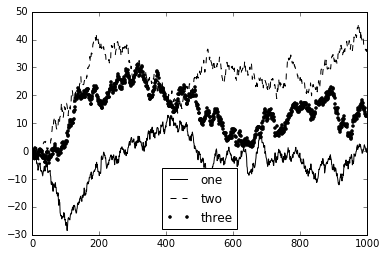

In [99]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')
plt.show()
plt.savefig('figpath.svg')

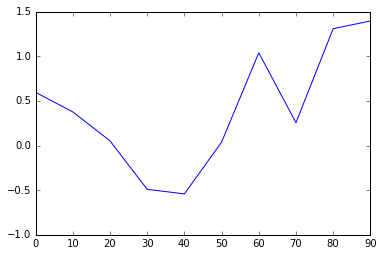

In [100]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

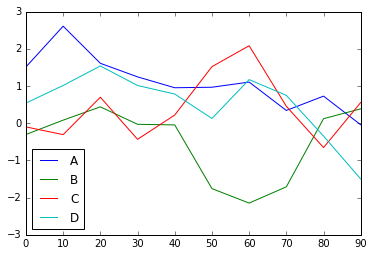

In [111]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'] ,index=np.arange(0, 100, 10))
df.plot()

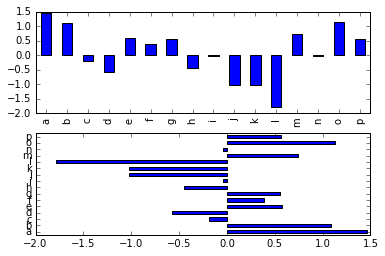

In [114]:
fig, axes = plt.subplots(2, 1)
data_d = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data_d.plot(kind='bar', ax=axes[0])
data_d.plot(kind='barh', ax=axes[1])
plt.show()

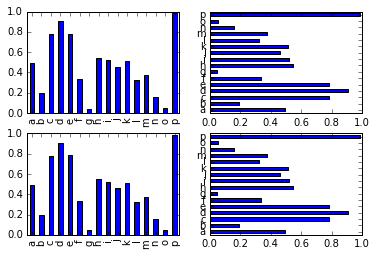

In [130]:
fig, axes = plt.subplots(2, 2)
data_1 = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data_1.plot(kind='bar', ax=axes[0,0])
data_1.plot(kind='barh', ax=axes[1,1])
data_1.plot(kind='barh', ax=axes[0,1])
data_1.plot(kind='bar', ax=axes[1,0])
plt.show()

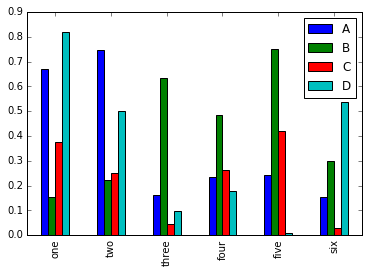

In [129]:
df_stack = pd.DataFrame(np.random.rand(6, 4),
                       index=['one', 'two', 'three', 'four', 'five', 'six'],
                       columns=pd.Index(['A', 'B', 'C', 'D'], names='Genus'))
df_stack.plot(kind='bar')